# First Post about Reinforcement learning


### Basic Concept of RL 

Reinforcement learning is a segment of Machine learning, to be exact it is placed under the section of *supervised learning*. With multiple runs, the algorithm's goal is to develope a strategy which will maximize the profit and thus minimizing the losses.

The two main elements of Reinforcement learning are the __agents__ and an __environment__ that the agent can interact with. 
First, let us define these elements: <br>

__Environment__: The environment has a set of __states__ (s $\in$ S), where the __rewards__ (r $\in$ R) are placed in <br>

__Agent__: The agent has a set of __actions__ (a $\in$ A) that it can execute inside a given environment. It will receive a reward and is placed into a new state s' $\in$ S after an action is taken. Its main goal is to maximize the rewards  <br>

Here is a very simple depiction of the interaction.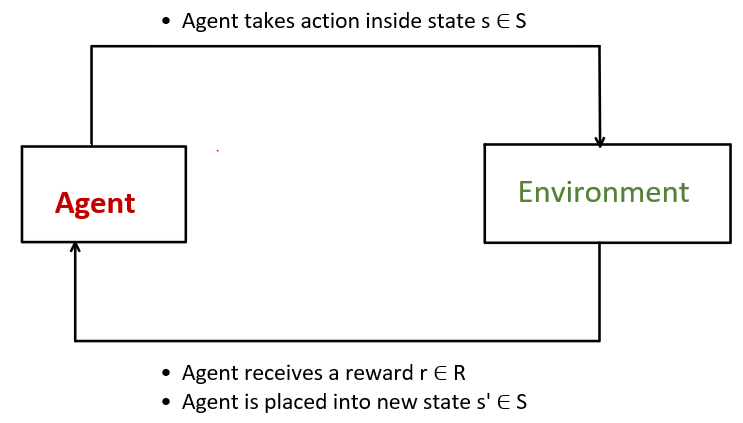 <br>
This is obviously quite superficial and we can't really see where Reinforcement learning takes place but it gives you the basic idea. To delve a little bit deeper there are some more elements that need to be defined first: <br>




We define *optimal* as the maximized rewards the agent can receive.


It is already stated that the main goal is to maximize the rewards inside the environment and to do that the agent needs to evolve a strategy with a certain __policy__ ($\pi$) which purpose is to take an optimal action within a state *s*. We will note that down as $\pi$(s).

To distinguish the different sequences of states and actions followed by the rewards, we can note down the time __t= 1,2,3...T__ and tag the observed sequences until termination e.g __$S_1,A_1,R_2...S_T$__.

The value function __V(s)__ defines the future reward when the agent is in state *s*. To unravel the equation, it gives you the __expected return__ while being in state *s* at the time t: __$V(s)= \mathbb{E}[G_t|S_t=s]$__<br> 

 $\mathbb{E}$ stands for the expectancy and $G_t$ for the return or future rewards. We can decompose $G_t$ into the __sum__ of rewards with a discounting factor for future rewards: __$G_t = R_{t+1}+\gamma R_{t+2}+ \gamma^2 R_{t+3}+... = \sum_{k=0}^{\infty} \gamma^kR_{t+k+1} $__ with the discounting factor being defined as a number between 0 and 1: __$\gamma \in [0,1]$__. It measures the importance of the immediate reward and future rewards and helps us avoiding an infinite loop in a state transition graph which basically would mean we can get infinity as a reward.


The *model* simply describes the environment which means the agent can use the environment to achieve optimality. Furthermore, it can be separated into model-based and model-free RL.

### Introduction: model-free Reinforcement learning 

model-free means that the agent is not relying on the model of the environment to find the best solution but rather taking its own experience by actions and rewards, disregarding which state it is in and takes no usage of __transition- and reward functions__. So in other words, the goal is to get the optimal policy without studying the entire environment. You can describe it as a sort of reactive approach. There are several algorithms that support model-free RL but for better understanding we can take a look on a real life example first and later on we will introduce the algorithms.

#### Example(model-free):

Let us say you are driving from home to work for the first time. The streets (__states__) from your home to work is the environment and to be on time, the optimal "reward" is the fastest way to reach your destination so in other words, the minimum travel-time is your __maximized reward__. Every street adds up an amount of time(__reward__) to your total travel-time. The turning of directions are the possible __actions__ that you can take. <br>

So when you start you will likely get a bad result which means a high travel-time, because you pick the streets randomly.<br> You do this for the next day and maybe for the day after as well but you start to notice that some streets are getting you faster to work than others. After a week or so you have optimized the way by __learning__ from your own past actions and picking the best streets. With numerous repeated attempts and doing something different in each attempt, optimality has been achieved. <br>


In RL the agent will take the same approach as described in the example. It will pick states randomly and after some time the value function V(s) will show that some future rewards in certain states are better than rewards in other states. A policy $\pi(s)$ can be derived from this value function. 



### Introduction: model-based Reinforcement learning

In model-based RL the agent makes use of the model that has been applied to the environment.
At the beginning it is stated that we have no transition- or reward function in advance to apply on our environment. However our agent can receive these functions either from an external source or it can be learned while interacting with the environment. The transition function is defined as the probability to change the state to *s'* while being in state *s* and taking action *a*: __P(s'|s,a)__.<br>
The Reward function shows us the the reward when the agent is in state *s*, perfoming an action *a* and transitioning into state *s'*:__R(s,a,s')__. <br>

So in summary it uses the environment to estimate the policy and therefore trying to achieve optimality with the model of the environment. We can use the example from the model-free section again to make that approach a bit more intuitive. <br>

#### Example(model-based):

The same states and rewards are given in the environment. The agent can still perform the same actions but this time we have a model of the environment. In context terms it means that we have a basic understanding of the streets and the travel-time. We may have taken that knowledge by studying a map or the colleague from work, who coincidentally lives next to you, has given you an approximate description of which streets have the least travel-time. <br>
Either way, we now can apply our learned model and, unlike in the model-free approach, you don't start off randomly, because with our transition function we can measure the probability of changing  to state *s'* and the most appropriate action is chosen. <br>


Here are two illustrations of these approaches, clarifying the key differences.

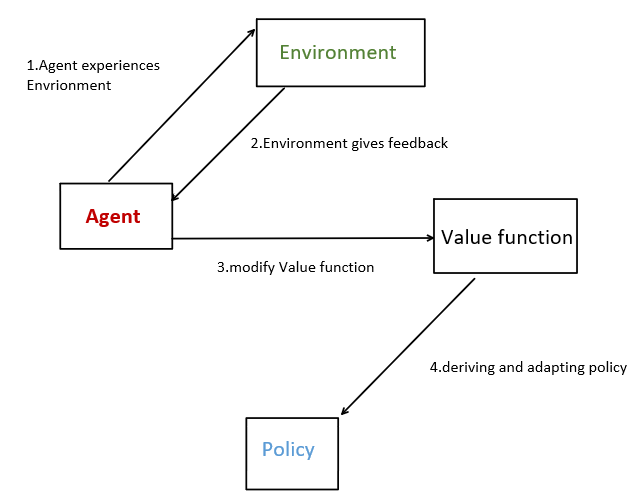  __model-free__

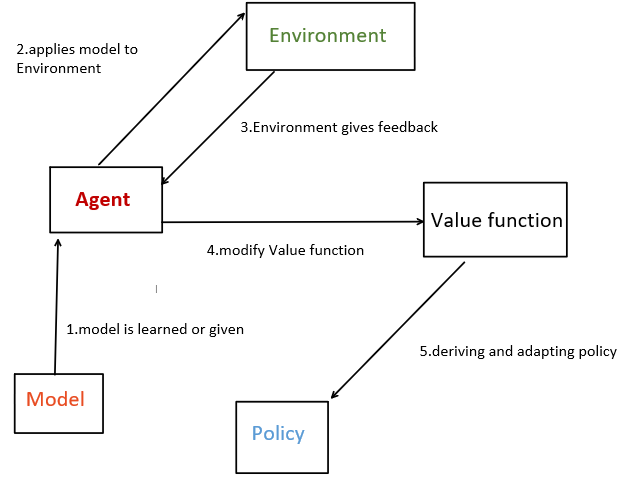 __model-based__
<br>

Both of these approaches aim to achieve an optimal policy and getting the best values of the states but it is not clearly defined how these values can be optimized. That is where the Bellman equations can help to this problem. 


### Bellman Equation and Optimization

#### MDP

First, we have to define the Markov Decision Problem (MDP). It is vital on how we apply the Bellman Equations that will be introduced later on.<br>
The MDP has five elements to model the decisions inside an environment. It is quite similar to the illustration that is shown at the beginning:
- It has a set of states $S$ that the agent can be in
- A set of possible actions $A$ that can be performed in a state
- A transitioning function $P$ to indicate the probabilties for transitioning to a new state, when performing an action in the current state
- A Reward function $R$ to indicate the rewards after perfoming an action in the current state
- A discounting factor $\gamma$, which indicates the importance of the immediate rewards as well as the future rewards.<br>
As mentioned before, it is similar to the Agent-Environment Interaction Image and to illustrate the MDP, it simply needs a few changes.
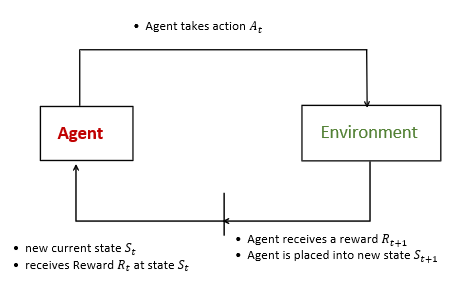<br>

The MDP posseses the __*Markov Property*__ and it states, that the next state is only dependent on the current state the agent is in: $\mathbb{P}[S_{t+1}\vert S_t]=\mathbb{P}[S_{t+1}\vert S_1,…,S_t]$.  The transition from $S_t$ to $S_{t+1}$ has no dependency on the past states.
The purpose is to implement a policy that will make decisions and finding the optimal reward for the long-term.


#### Bellman Equations

The policy changes consistently during the learning process which means that we have also different value functions for each policy
The idea behind the Bellman Equation is to help finding the optimal policies and value functions by splitting the Value function into the __immediate reward__ added up with the __discounted value__ of future states: $V(s) = \mathbb{E} [R_{t+1} + \gamma V(S_{t+1}) \vert S_t = s]$. <br>
Furthermore, we can specify it as a __Bellman Expectation Equation__: $V_\pi(s)=\mathbb{E}_\pi[R_{t+1}+\gamma V_\pi(S_{t+1}) \vert S_t = s] $ As you can see, the function still remains the same as the Bellman Equation. The only difference is, that it uses the __state-value__ function, which tells us the value of a state while depending on a policy $\pi$ and the equation takes the expectency $\mathbb{E}$ out of it. <br>

Finally, if we want to find the optimal values without taking the expectation and policy into perspective, we can take a look at the __maximum expected return__ of our value function if we take an action in a state:$V_*(s) =max (\mathbb{E}[G_t \vert S_t = s, A_t = a])$ if we leave out the maximum we actually have a *__Q-Value__* or  *__State-Action Value__* that is not fully introduced yet, since it is specifically used in one of the RL-Algorithms (Q-Learning) however in this case, we can identify $V_*(s)$ as $V_*(s) = {max}_{a \in A}Q_*(s,a)$. In other words, the *optimal value* of our value function is the *optimal Q-Value*. This is referred to as the __Bellman Optimality Equation__.<br> <br>











In this post we have looked at the basic concept of Reinforcement learning and defined the core elements. Moreover, the two basic approaches of achieving the optimal policy have been introduced and at last, we have looked at how values can be optimized with the help of Bellman Equations and MDP. 